# Importing data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = r'C:\Users\psiva\Desktop\coapps project\data\StudentsMonthlyExpenses.csv'
df = pd.read_csv(file_path, encoding='ascii')
df.head()

,Gender,Age,Study_year,Living,Scholarship,Part_time_job,Transporting,Smoking,Drinks,Games_&_Hobbies,Cosmetics_&_Self-care,Monthly_Subscription,Monthly_expenses_$
0,Female,21,2.0,Home,No,No,No,No,No,No,Yes,No,150.0
1,Male,25,3.0,Hostel,No,Yes,Motorcycle,No,No,Yes,Yes,Yes,220.0
2,Male,23,2.0,Home,Yes,No,No,No,No,No,No,NaN,180.0
3,Male,19,3.0,Hostel,No,No,Motorcycle,No,No,Yes,Yes,Yes,200.0
4,Female,19,2.0,Home,No,No,Motorcycle,No,No,No,Yes,No,300.0


# Graphical representation

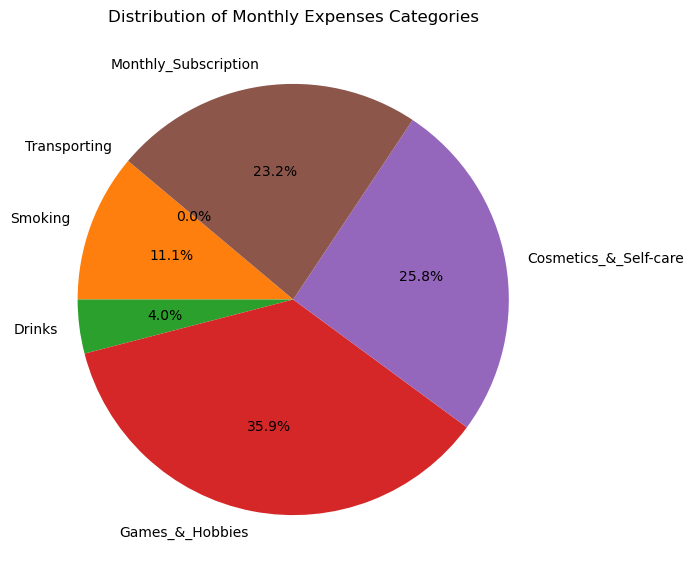

In [5]:
categories = ['Transporting', 'Smoking', 'Drinks', 'Games_&_Hobbies', 'Cosmetics_&_Self-care', 'Monthly_Subscription']
expenses_sum = df[categories].apply(pd.Series.value_counts).fillna(0).loc['Yes'].to_dict()
plt.figure(figsize=(10, 7), facecolor='white')
plt.pie(expenses_sum.values(), labels=expenses_sum.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Monthly Expenses Categories')
plt.show()

# total expendeture of the students in the data set

In [6]:
total_monthly_expense = df['Monthly_expenses_$'].sum()
total_monthly_expense

21280.0

# Large amount of expences in data

In [8]:
category_counts = df[categories].apply(lambda x: x == 'Yes').sum()
largest_expense_category = category_counts.idxmax()
largest_expense_count = category_counts.max()
print('Largest Expense Category:', largest_expense_category)
print('Count:', largest_expense_count)

Largest Expense Category: Games_&_Hobbies
Count: 71


# Average expences for a single student

In [11]:
category_averages = df[categories].apply(lambda x: (x == 'Yes').mean())
category_std = df[categories].apply(lambda x: (x == 'Yes').std())
unusual_expenses = df.apply(lambda x: ((x[categories] == 'Yes').astype(int) - category_averages) / category_std, axis=1)
unusual_expenses_high = unusual_expenses > 2
unusual_expenses_low = unusual_expenses < -2
unusual_high_summary = unusual_expenses_high.sum().sum()
unusual_low_summary = unusual_expenses_low.sum().sum()
print('Number of unusually high expenses across categories:', unusual_high_summary)
print('Number of unusually low expenses across categories:', unusual_low_summary)

Number of unusually high expenses across categories: 8
Number of unusually low expenses across categories: 0


# Bar graph

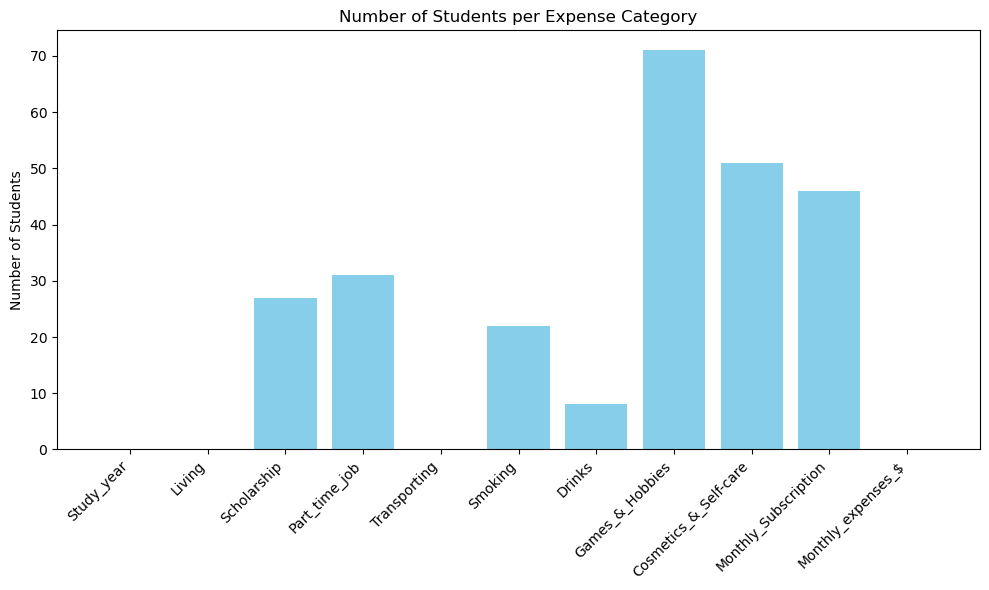

In [13]:
df = pd.read_csv(file_path, encoding='ascii')
category_sums = df.iloc[:, 2:].apply(lambda x: x.value_counts().get('Yes', 0))
plt.figure(figsize=(10, 6), facecolor='white')
plt.bar(category_sums.index, category_sums.values, color='skyblue')
plt.title('Number of Students per Expense Category')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()